## Import modules

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# set custom pd settings
pd.set_option('display.max_columns', None)

## Import train and test sets

In [12]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [13]:
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,1.527432,0.707460,-1.127066,0.153136,-0.920603,0.926109,-0.358535,0.515376,-1.696963,0.964016,-0.357598,1.546008,0.389179,1.387348,0.872806,1.138468,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
1,1.600625,0.575450,1.604127,-1.291524,-0.426578,0.449880,1.304687,-2.530059,-1.354781,-0.145963,-1.229461,-0.021949,-0.026958,1.729004,0.872806,0.811144,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,1.381046,0.166217,0.509011,-0.373362,-0.615088,1.304650,-0.706957,0.838953,-1.012600,-0.770327,-1.537177,-0.480165,-1.961433,-1.744498,0.733680,2.120442,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,1.381046,0.153016,-0.856586,0.487013,-0.569586,0.230082,0.765619,0.007803,-0.683091,0.409026,-0.665315,0.085445,0.136123,0.431977,-1.878785,-1.152804,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4,-0.741544,0.872473,-0.566314,-0.630190,-0.264070,1.475604,0.443493,-2.098622,-0.936559,0.339653,0.770694,0.214318,1.007762,-0.814435,-0.193822,-0.825479,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [14]:
X_test.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,1.527432,-2.460790,-0.434372,1.141926,0.418465,1.438971,-0.726679,0.109318,0.780686,0.894643,-0.408885,1.395656,-1.230381,1.608792,0.950098,0.483819,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,1.673818,-1.338701,-1.588862,0.474172,-1.167616,0.089655,-0.634643,1.517832,0.185036,-1.047822,-1.947466,0.844365,1.131478,-1.206706,-1.492325,-1.152804,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,-1.473472,-1.259495,-2.103435,1.308864,1.114000,1.493921,-2.028331,-0.499769,1.433366,-0.145963,0.924553,-0.021949,-0.026958,1.729004,1.011931,1.465793,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,-0.668352,0.159617,0.581579,-2.980170,1.205005,1.414549,1.705701,0.654958,0.083649,-1.533438,-0.665315,0.493543,-0.414978,0.273803,-1.152241,-0.498155,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,-0.668352,-1.107683,-0.962139,1.052036,0.606974,-0.343836,-2.435919,-0.277706,-0.550021,0.339653,0.719408,0.214318,1.007762,-0.814435,0.671847,1.793117,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


# Logistic Regression Model

### Baseline model without weights

In [132]:
# instantiate model
lr = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr.fit(X_train, y_train.values.ravel())

# Predict test values
y_pred_test = lr.predict(X_test)

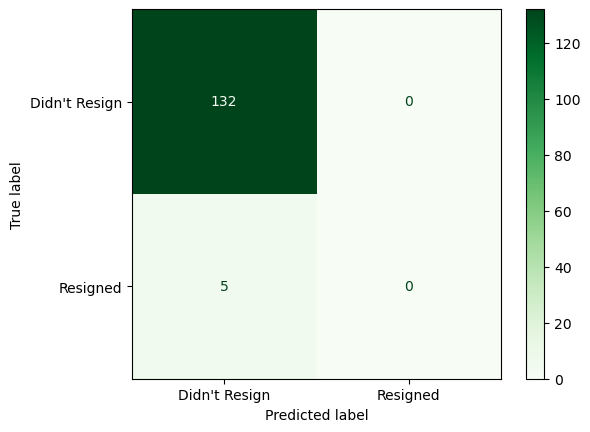

In [133]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

There were no true positives predicted

In [134]:
# Classification report for testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       0.00      0.00      0.00         5

    accuracy                           0.96       137
   macro avg       0.48      0.50      0.49       137
weighted avg       0.93      0.96      0.95       137



/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [135]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9635036496350365
Area Under Curve: 0.5
Confusion Matrix: 
[[132   0]
 [  5   0]]
Recall score: 0.0


The metrics for the baseline model indicate that the model's performance is very poor even though there is a high accuracy score. The recall score is zero which means that there were no employees correctly classified as a resignation. Lastly, the AUC score of 0.49 indicates that the model performs no better than random guessing. 

### Acccounting for Imbalanced Data: Weighted Logistic Regression

In [136]:
# specify weight proportional to class imbalance
w = {0:2, 1:98}

# instantiate model with specified weight params
weighted_lr = LogisticRegression(solver = 'liblinear', max_iter = 500, class_weight=w)

# fit model to training data
weighted_lr.fit(X_train, y_train.values.ravel())

# predict values
y_pred = weighted_lr.predict(X_test)

In [137]:
# Check metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9416058394160584
Area Under Curve: 0.5848484848484848
Confusion Matrix: 
[[128   4]
 [  4   1]]
Recall score: 0.2


After adding the `class_weight` attribute, there is marginal improvement in the AUC score

### Find Best Weights with GridSearchCV

In [138]:
# define grid of weights
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

params = {'class_weight': w}

# define model
lr3 = LogisticRegression(max_iter=500, random_state=13)

# define Randomized CV
grid = GridSearchCV(lr3, params, scoring="roc_auc", n_jobs=-1, refit=True)

# fit CV
grid.fit(X_train, y_train.values.ravel())

# get best score and params
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9017133956386292 with param: {'class_weight': {0: 0.001, 1: 1.0}}


In [139]:
# check model with best weights
w = {0: 0.001, 1: 1}

# define model
lr4 = LogisticRegression(class_weight=w, random_state=13)

# fit it
lr4.fit(X_train, y_train.values.ravel())

# test
y_pred = lr4.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.11678832116788321
Confusion Matrix: 
[[ 11 121]
 [  0   5]]
Area Under Curve: 0.5416666666666667
Recall score: 1.0


Using the best params from the grid search of `class_weight` alone, the accuracy dramatically decreased, and so did the AUC score. 

### Hyperparam tuning 

In [125]:
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"penalty": ["l1", "l2"]
                   ,"C": crange,
                   "solver":['liblinear', 'newton-cholesky'],
                   'class_weight':w
                  }

# logistic model classifier
lg4 = LogisticRegression(random_state=13, max_iter=500)

# define evaluation procedure
grid = GridSearchCV(lg4, hyperparam_grid, scoring="roc_auc", n_jobs=-1, refit=True)

grid.fit(X_train, y_train.values.ravel())

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9256230529595015 with param: {'C': 0.5, 'class_weight': {0: 0.01, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
13650 fits failed out of a total of 27300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13650 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kylerodriguez/miniconda3/envs/employee-attrition/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

### LogReg Model with Optimized Params

In [146]:
lg5 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.5, class_weight={0: 0.01, 1: 10}, random_state=13, max_iter=500,)

lg5.fit(X_train, y_train.values.ravel())

y_pred = lg5.predict(X_test)

lg5_score = roc_auc_score(y_test, y_pred)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('Area Under Curve: ', lg5_score)
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6788321167883211
Confusion Matrix: 
[[88 44]
 [ 0  5]]
Area Under Curve:  0.8333333333333334
Recall score: 1.0


After some hyperparameter tuning, we're left with a significantly improved AUC score however at the expense of a marked drop in accuracy.

In [147]:
model_scores = {'LogReg':lg5_score}


# K-Nearest Neighbor